<a href="https://colab.research.google.com/github/Alexandermontes/cross_var/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


Instructions for updating:
non-resource variables are not supported in the long term
2.4.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Samdal', 'Shirt',  'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print('tamaño del conjunto de entrenamiento', train_images.shape)
print('numero de muestras de entrenamiento', len(train_labels))

test_images.shape
len(test_labels)

print('tamaños del conjunto de prueba', test_images.shape)
print('Numero de muestras de prueba', len(test_labels))

tamaño del conjunto de entrenamiento (60000, 28, 28)
numero de muestras de entrenamiento 60000
tamaños del conjunto de prueba (10000, 28, 28)
Numero de muestras de prueba 10000


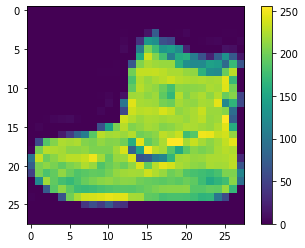

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

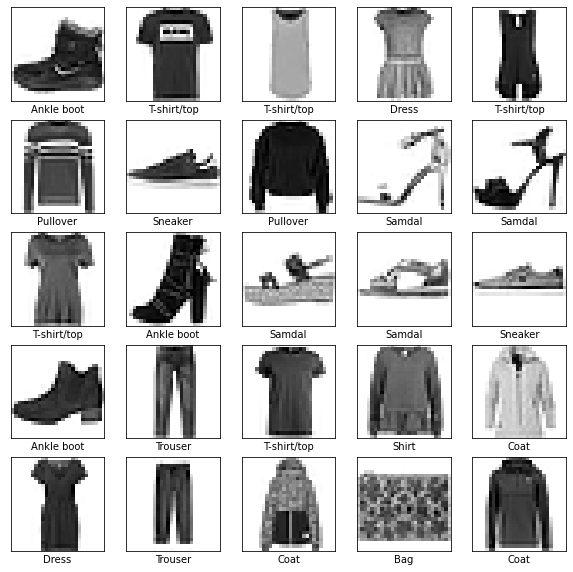

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)                                             
])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4948 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3760 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3383 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3125 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2967 - acc: 0.8899


In [ ]:
test_loss, test_acc, = model.evaluate(test_images, test_labels)
print('test accuracy;', test_acc)

test accuracy; 0.8743


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([3.2418488e-06, 1.0964058e-06, 5.5199399e-07, 2.5131972e-06,
       4.6092379e-07, 2.4260642e-02, 2.3883090e-06, 1.2519307e-01,
       3.9088747e-05, 8.5049689e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)
def plot_value_array (i, predictions_array, true_label):
  predictions_array, true_label= predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show>

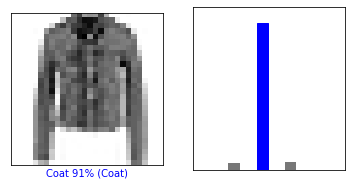

In [ ]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show

<function matplotlib.pyplot.show>

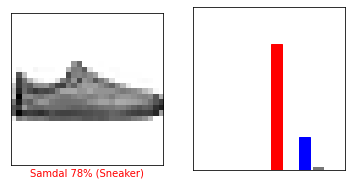

In [ ]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show